In [1]:
#####Preliminary authentications and package loadings
consumer_key= 'XVYeivrXC9ECoj2rP8YFVkbOL'
consumer_secret= '5cVypcLC7dx8CfD8xn65mGL9EbFMZJw2L8DeeBiNx4SL9yWIkc'
access_token= '1493738062525779973-2XRNQLetgDtrpdN6nHIjmz2FBBFaFB'
access_token_secret= 'Pshj4J8faGkIFmQjrVAIWfJAXwKRt0WTM9SNSjAHOf370'
bearer_token='AAAAAAAAAAAAAAAAAAAAAPU8ZQEAAAAAGk7lwN4YdyK0Q8Af6XZq0NvL5qs%3DWH1X4LjRZY33XprMV7ZcVltxMO61DBqBbhTG3EwPkrkWiQssue'

import tweepy as tw
import pandas as pd
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

twitter_df = pd.read_pickle(r"C:\Users\stokg\Downloads\gender_full_dataset_with_m3_March18.pkl")
labels=pd.read_pickle(r"C:\Users\stokg\Downloads\kmeans_ncluster=3 (2).pkl")

twitter_df = twitter_df.assign(ratio=lambda x: x.reply_count/(x.retweet_count+1))
twitter_df['ratioed'] = np.where(twitter_df['ratio']>10, True, False)
twitter_df['label_K3']=labels
twitter_df.columns
twitter_df.head()

,author_id,id,retweet_count,reply_count,like_count,quote_count,text,source,referenced_tweets,created_at,...,user_url,user_username,user_verified,user_withheld,gender,age,org,ratio,ratioed,label_K3
0,39189472,1477065673939378177,0,0,0,0,even as I sit here in this silver lake coffee ...,Twitter for iPhone,NaN,2021-12-31 23:54:33+00:00,...,,andrearrrrrrr_,False,None,male,<=18,non-org,0.0,False,0
1,88981023,1477065152994459652,0,0,1,0,@mona_s @Lt_Fedora Still lobbying for Barbie i...,Twitter for iPhone,[<ReferencedTweet id=1477048448964775937 type=...,2021-12-31 23:52:29+00:00,...,https://t.co/ueDtZEoiGF,BrendaBTremblay,False,None,female,19-29,non-org,0.0,False,2
2,759021667498627072,1477065021259661312,0,0,0,0,@VickiLynnLawson @xjelliott I look at our GOP ...,Twitter for iPhone,[<ReferencedTweet id=1476975641471893507 type=...,2021-12-31 23:51:58+00:00,...,,soul2shine2,False,None,female,19-29,non-org,0.0,False,0
3,1374419199355883530,1477064581063352324,0,0,1,0,I thank God I have a very masculine man. I lov...,Twitter for iPhone,NaN,2021-12-31 23:50:13+00:00,...,https://t.co/8OtzyPhCvJ,_jadajayyy_,False,None,NaN,NaN,NaN,0.0,False,1
4,14399730,1477064397436690432,0,0,1,0,@StandardbredGal Wait a minute! Testosterone i...,Twitter for Android,[<ReferencedTweet id=1476967453628456969 type=...,2021-12-31 23:49:29+00:00,...,,righthind,False,None,male,>=40,non-org,0.0,False,1


# NLP

In [2]:
import pandas as pd
import nltk
#nltk.download('wordnet')
from nltk import WordNetLemmatizer
##Clean Tokens
list_tokens = [i.strip('][').split(', ') for i in list(twitter_df['tokens'])]
list_tokens_clean = []
for tokens in list_tokens:
    bucket = []
    for token in tokens:
        bucket.append(token.replace("'", ""))
    list_tokens_clean.append(bucket)
##Lemmatize the Tweets
lemmatizer = WordNetLemmatizer()
def lemmatize_fn(text):
    text_lemmatized = [lemmatizer.lemmatize(token) for token in text]
    return text_lemmatized
##Create LEmmatized Columns
list_lemmatized = [lemmatize_fn(text) for text in list_tokens_clean]  
twitter_df['lemmatized_text'] = list_lemmatized

In [3]:
list_strings = [' '.join(i) for i in list_lemmatized]
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(list_strings)
print(list_strings[0])
print(X[0])
print(twitter_df['tokens'][0])

even sit silver lake coffee shop listening pretentious guy mansplain film toxicity instagram girl help wonder people think anything best city world
  (0, 62231)	0.1628492855582882
  (0, 11248)	0.21970029607695302
  (0, 6837)	0.180640092011127
  (0, 4107)	0.17123422743655387
  (0, 56168)	0.12938193587645344
  (0, 42173)	0.12121956978656045
  (0, 62104)	0.20867938812142742
  (0, 26278)	0.17433230059079302
  (0, 23959)	0.15338762747485915
  (0, 29249)	0.2483478780781462
  (0, 57044)	0.2600316818714642
  (0, 21483)	0.21994127085362317
  (0, 34842)	0.17227533053627017
  (0, 25213)	0.15454654098522905
  (0, 44202)	0.32099198726691397
  (0, 33323)	0.22006243853835017
  (0, 50846)	0.2371084698891044
  (0, 11802)	0.2489381695436561
  (0, 32172)	0.288576209917161
  (0, 51182)	0.28473044454104707
  (0, 51367)	0.22061341269196544
  (0, 19846)	0.1430272034925948
['even', 'sit', 'silver', 'lake', 'coffee', 'shop', 'listening', 'pretentious', 'guy', 'mansplain', 'film', 'toxicity', 'instagram', 'girl

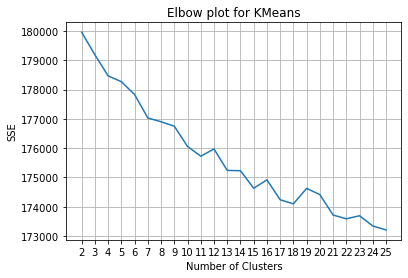

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = [] 
for k in range(2, 26):
    kmeans = KMeans(init='k-means++',n_clusters=k, n_init=1,max_iter=75)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.plot(range(2, 26), sse)
plt.title("Elbow plot for KMeans")
plt.xticks(range(2, 26))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.grid()
plt.show()

In [11]:
kmean=KMeans(init='k-means++',n_clusters=18, n_init=10,max_iter=100).fit(X)

kmean.cluster_centers_.T
#for i in range(len(X)):
 #   print('{:<25} {}'.format(X[i], kmean.cluster_centers_.T[i]))

array([[1.74152479e-04, 8.98024949e-05, 0.00000000e+00, ...,
        4.05044512e-04, 4.79243126e-04, 7.25206643e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.36885203e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.65733394e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.58228030e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [14]:
len(kmean.cluster_centers_[0])

63293

# Preliminary Data Analysis

In [67]:
cond1=twitter_df["gender"]=='male'
cond2=twitter_df["gender"]=='female'
cond3=twitter_df["gender"].isnull()
print(len(twitter_df[cond1])/len(twitter_df))
print(len(twitter_df[cond2])/len(twitter_df))
print(len(twitter_df[cond3])/len(twitter_df))

cond1=twitter_df["age"]=='>=40'
cond2=twitter_df["age"]=='30-39'
cond3=twitter_df["age"]=='19-29'
cond4=twitter_df["age"]=='<=18'
cond5=twitter_df["age"].isnull()
print('Age')
print(len(twitter_df[cond1])/len(twitter_df))
print(len(twitter_df[cond2])/len(twitter_df))
print(len(twitter_df[cond3])/len(twitter_df))
print(len(twitter_df[cond4])/len(twitter_df))
print(len(twitter_df[cond5])/len(twitter_df))
print('Orgs')
cond1=twitter_df["org"]=='non-org'
cond2=twitter_df["org"]=='is-org'
cond3=twitter_df["org"].isnull()
print(len(twitter_df[cond1])/len(twitter_df))
print(len(twitter_df[cond2])/len(twitter_df))
print(len(twitter_df[cond3])/len(twitter_df))

0.4851574755641366
0.3944677863466327
0.12037473808923067
Age
0.2994449137202848
0.17101264850752
0.2953640422567658
0.11380365742619876
0.12037473808923067
Orgs
0.8516954265717389
0.027929835339030464
0.12037473808923067


In [4]:
cond_like=twitter_df["like_count"]>5000
twitter_df[cond_like][['user_name','user_username','like_count','cleaned text']].head(50)

,user_name,user_username,like_count,cleaned text
709,Lindy Li,lindyli,5426,fmr senate majority leader harry reid 2019 the...
2926,✨ i’m the pressure applied. ✨,FatBlackLuxury,6473,doja cat rapper her music rap her bars eating ...
13872,¢orie,corietjohnson,14346,the feminine urge pay installments
17084,Lindy Li,lindyli,11128,gop senate candidate sean parnell strangled hi...
18811,Lindy Li,lindyli,6823,virginia results via white women youngkin mcau...
19726,Lindy Li,lindyli,5526,the pope said biden good catholic may keep rec...
22282,🌹⚡️Liz Field⚡️🌹,lizlovesmusic,6345,mom was feminist but loved doing laundry never...
23550,Lindy Li,lindyli,7768,greg abbott tonight the covid vaccine safe but...
29205,Because I’m Blasian,ThisIsNotKam,7314,ahhh the black boys could the olympics doing g...
29563,Val ❤️‍🔥,laurrrelyse,6169,this feels racist sexist


In [53]:
twitter_df[cond1 & cond2]['user_followers_count'].count()/twitter_df['user_followers_count'].count()


0.022839716094211086

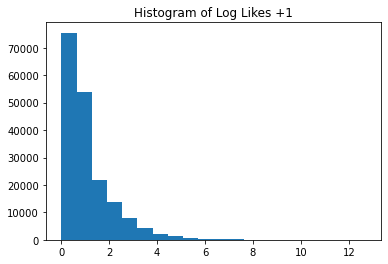

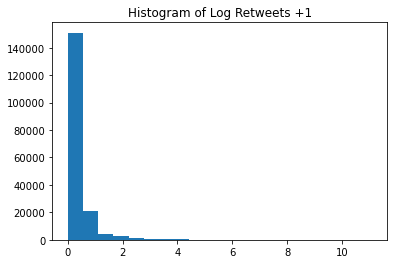

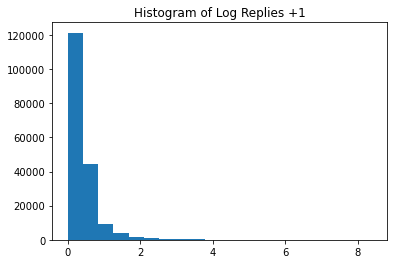

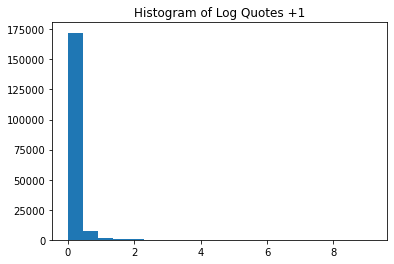

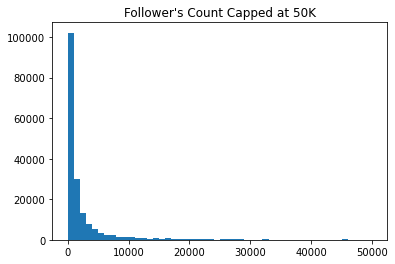

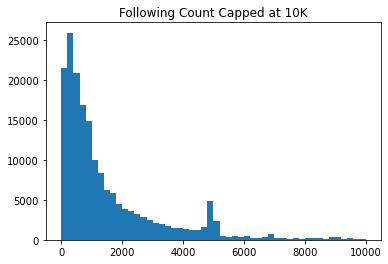

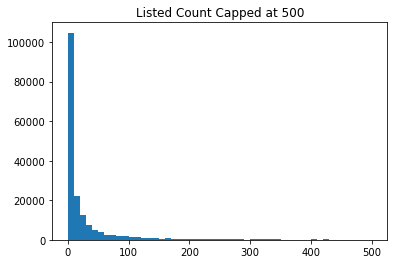

In [43]:
import numpy as np
import matplotlib.pyplot as plt

nr_bins = 20
plt.hist(np.log(twitter_df["like_count"]+1),bins=nr_bins);
plt.title("Histogram of Log Likes +1")
plt.show()

plt.hist(np.log(twitter_df["retweet_count"]+1),bins=nr_bins);
plt.title("Histogram of Log Retweets +1")
plt.show()
plt.hist(np.log(twitter_df["reply_count"]+1),bins=nr_bins);
plt.title("Histogram of Log Replies +1")
plt.show()
plt.hist(np.log(twitter_df["quote_count"]+1),bins=nr_bins);
plt.title("Histogram of Log Quotes +1")
plt.show()
plt.hist(twitter_df["user_followers_count"],bins=50,range=(0, 50000));
plt.title("Follower's Count Capped at 50K")
plt.show()
plt.hist(twitter_df["user_following_count"],bins=50,range=(0, 10000));
plt.title("Following Count Capped at 10K")
plt.show()
plt.hist(twitter_df["user_listed_count"],bins=50,range=(0, 500));
plt.title("Listed Count Capped at 500")
plt.show()


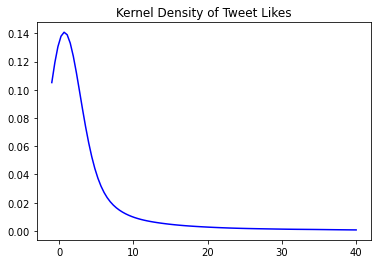

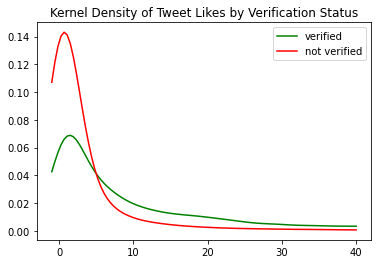

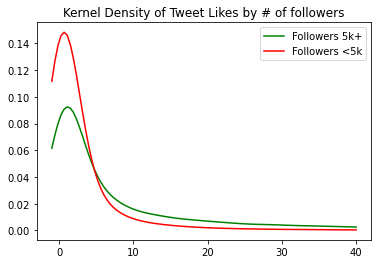

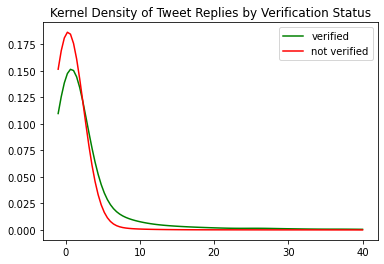

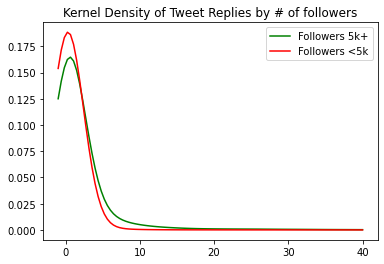

In [14]:
from sklearn.neighbors import KernelDensity
#Run Kernal Density and fit based on our sample

gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'b')
plt.title("Kernel Density of Tweet Likes")
plt.show()


gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[twitter_df['user_verified']==True]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'g',label='verified')
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[twitter_df['user_verified']==False]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'r',label='not verified')
plt.legend()
plt.title("Kernel Density of Tweet Likes by Verification Status")
plt.show()


gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[twitter_df['user_followers_count']>5000]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'g',label='Followers 5k+')
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[twitter_df['user_followers_count']<=5000]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'r',label='Followers <5k')
plt.legend()
plt.title("Kernel Density of Tweet Likes by # of followers")
plt.show()

gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[twitter_df['user_verified']==True]["reply_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'g',label='verified')
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[twitter_df['user_verified']==False]["reply_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'r',label='not verified')
plt.legend()
plt.title("Kernel Density of Tweet Replies by Verification Status")
plt.show()


gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[twitter_df['user_followers_count']>5000]["reply_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'g',label='Followers 5k+')
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[twitter_df['user_followers_count']<=5000]["reply_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'r',label='Followers <5k')
plt.legend()
plt.title("Kernel Density of Tweet Replies by # of followers")
plt.show()

In [16]:
cond1=twitter_df["gender"].isnull()
len(twitter_df[cond1]["like_count"])

21946

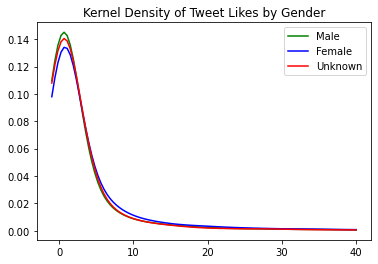

In [61]:
from sklearn.neighbors import KernelDensity
cond1=twitter_df["gender"]=='male'
cond2=twitter_df["gender"]=='female'
cond3=twitter_df["gender"].isnull()


gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[cond1]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'g',label='Male')
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[cond2]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'b',label='Female')
gkde=KernelDensity(kernel='gaussian',bandwidth=2.1).fit(np.ravel(twitter_df[cond3]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'r',label='Unknown')

plt.legend()
plt.title("Kernel Density of Tweet Likes by Gender")
plt.show()

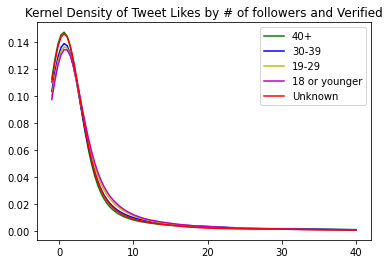

In [30]:
from sklearn.neighbors import KernelDensity
cond1=twitter_df["age"]=='>=40'
cond2=twitter_df["age"]=='30-39'
cond3=twitter_df["age"]=='19-29'
cond4=twitter_df["age"]=='<=18'
cond5=twitter_df["age"].isnull()


gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[cond1]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'g',label='40+')
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[cond2]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'b',label='30-39')
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[cond3]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'y',label='19-29')
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[cond4]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'m',label='18 or younger')
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[cond5]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'r',label='Unknown')

plt.legend()
plt.title("Kernel Density of Tweet Likes by Age")
plt.show()

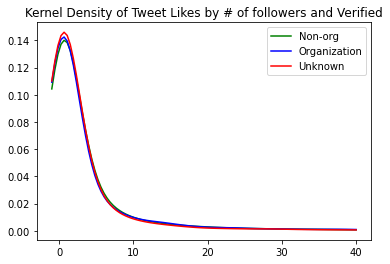

In [32]:
from sklearn.neighbors import KernelDensity
cond1=twitter_df["org"]=='non-org'
cond2=twitter_df["org"]=='is-org'
cond3=twitter_df["org"].isnull()


gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[cond1]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'g',label='Non-org')
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[cond2]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'b',label='Organization')
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[cond3]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'r',label='Unknown')


plt.legend()
plt.title("Kernel Density of Tweet Likes by Organization")
plt.show()

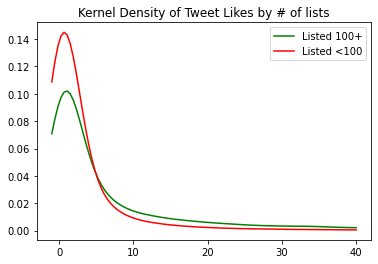

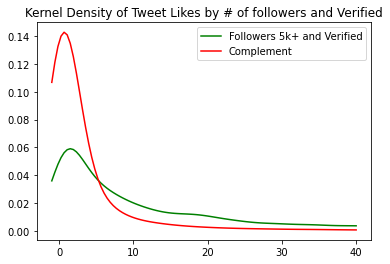

In [51]:
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[twitter_df['user_listed_count']>100]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'g',label='Listed 100+')
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[twitter_df['user_listed_count']<=100]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'r',label='Listed <100')
plt.legend()
plt.title("Kernel Density of Tweet Likes by # of lists")
plt.show()


cond1= twitter_df["user_followers_count"]>5000    
cond2= twitter_df["user_verified"]==True
cond3= twitter_df["user_followers_count"]<=5000    
cond4= twitter_df["user_verified"]==False

kde_1 = twitter_df[cond1 & cond2]
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[cond1 & cond2]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'g',label='Followers 5k+ and Verified')
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df[cond3 | cond4]["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'r',label='Complement')
plt.legend()
plt.title("Kernel Density of Tweet Likes by # of followers and Verified")
plt.show()

In [26]:
from scipy.stats import skew, kurtosis
label = ['Mean', 'Variance', 'Skewness', 'Kurtosis', 'First Quartile', 'Median', \
         'Third Quartile']
value = [np.mean(twitter_df["like_count"]), np.var(twitter_df["like_count"], ddof=1), skew(twitter_df["like_count"], bias=False), kurtosis(twitter_df["like_count"], bias=False), \
         np.quantile(twitter_df["like_count"], 0.25), np.quantile(twitter_df["like_count"], 0.50), np.quantile(twitter_df["like_count"], 0.75)]
print('***Summary Statistics of Likes***')
for i in range(len(label)):
    print('{:<25} {}'.format(label[i], round(value[i],2)))
value = [np.mean(twitter_df["retweet_count"]), np.var(twitter_df["retweet_count"], ddof=1), skew(twitter_df["retweet_count"], bias=False), kurtosis(twitter_df["retweet_count"], bias=False), \
         np.quantile(twitter_df["retweet_count"], 0.25), np.quantile(twitter_df["retweet_count"], 0.50), np.quantile(twitter_df["retweet_count"], 0.75)]
print('***Summary Statistics of Retweets***')
for i in range(len(label)):
    print('{:<25} {}'.format(label[i], round(value[i],2)))
value = [np.mean(twitter_df["reply_count"]), np.var(twitter_df["reply_count"], ddof=1), skew(twitter_df["reply_count"], bias=False), kurtosis(twitter_df["reply_count"], bias=False), \
         np.quantile(twitter_df["reply_count"], 0.25), np.quantile(twitter_df["reply_count"], 0.50), np.quantile(twitter_df["reply_count"], 0.75)]
print('***Summary Statistics of Replies***')
for i in range(len(label)):
    print('{:<25} {}'.format(label[i], round(value[i],2)))
value = [np.mean(twitter_df["quote_count"]), np.var(twitter_df["quote_count"], ddof=1), skew(twitter_df["quote_count"], bias=False), kurtosis(twitter_df["quote_count"], bias=False), \
         np.quantile(twitter_df["quote_count"], 0.25), np.quantile(twitter_df["quote_count"], 0.50), np.quantile(twitter_df["quote_count"], 0.75)]
print('***Summary Statistics of Quotes***')
for i in range(len(label)):
    print('{:<25} {}'.format(label[i], round(value[i],2)))

##User Summary
value = [np.mean(twitter_df["user_followers_count"]), np.var(twitter_df["user_followers_count"], ddof=1), skew(twitter_df["user_followers_count"], bias=False), kurtosis(twitter_df["user_followers_count"], bias=False), \
         np.quantile(twitter_df["user_followers_count"], 0.25), np.quantile(twitter_df["user_followers_count"], 0.50), np.quantile(twitter_df["user_followers_count"], 0.75)]
print('***Summary Statistics of Followers***')
for i in range(len(label)):
    print('{:<25} {}'.format(label[i], round(value[i],2)))
print("Summary of Verified")
print("% Verified: ", round(np.mean(twitter_df["user_verified"]),2))


***Summary Statistics of Likes***
Mean                      18.01
Variance                  1269362.22
Skewness                  239.68
Kurtosis                  63764.33
First Quartile            0.0
Median                    1.0
Third Quartile            3.0
***Summary Statistics of Retweets***
Mean                      2.68
Variance                  32821.79
Skewness                  286.32
Kurtosis                  96532.89
First Quartile            0.0
Median                    0.0
Third Quartile            0.0
***Summary Statistics of Replies***
Mean                      0.86
Variance                  245.29
Skewness                  168.74
Kurtosis                  39382.32
First Quartile            0.0
Median                    0.0
Third Quartile            1.0
***Summary Statistics of Quotes***
Mean                      0.34
Variance                  758.42
Skewness                  264.84
Kurtosis                  83334.9
First Quartile            0.0
Median                  

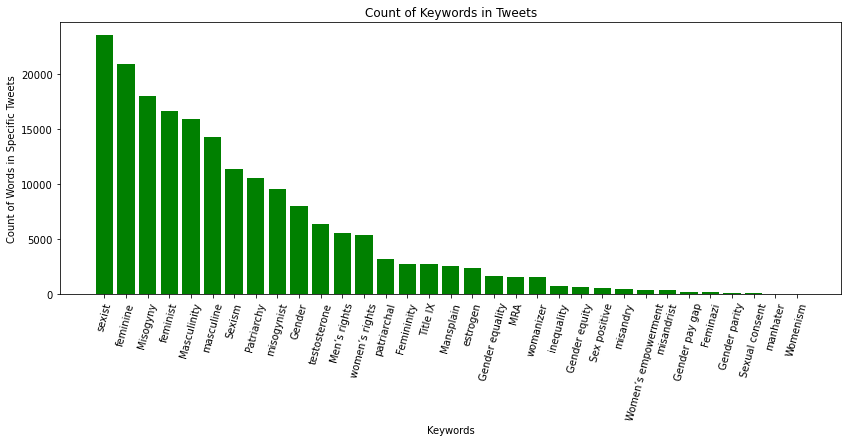

In [44]:
keywords=["Patriarchy", "Misogyny", "Sexism", "Gender", "inequality", "Gender pay gap", "Masculinity", "Femininity", "Gender equality", "Sexual consent", "Gender equity", "Womenism", "Women’s empowerment", "Gender parity", "sexist", "feminist", "misogynist", "misandrist", "misandry", "MRA", "Men’s rights", "women’s rights", "patriarchal", "masculine", "feminine", "Title IX", "Sex positive", "Mansplain", "Feminazi", "estrogen", "testosterone", "womanizer", "manhater"
]
text=twitter_df["text"].reset_index()
del text['index']
text=text["text"]

counts=np.zeros(len(keywords))
for j in range(len(keywords)):
    for i in range(len(text)):
        if keywords[j].casefold() in text[i].casefold():
            counts[j]+=1

#for i in range(0,len(keywords)):
    #print(keywords[i],counts[i])

grouped=pd.DataFrame([keywords,counts]).T
grouped.columns=['Keywords','Counts']
grouped=grouped.sort_values(["Counts"],ascending=False)

x_pos = [i for i, _ in enumerate(grouped["Keywords"])]
plt.figure(figsize=(14,5))
plt.bar(x_pos, grouped["Counts"], color='green')
plt.xlabel("Keywords")
plt.ylabel("Count of Words in Specific Tweets")
plt.title("Count of Keywords in Tweets")
plt.xticks(x_pos,grouped["Keywords"],rotation=75, fontsize=10)
plt.show()

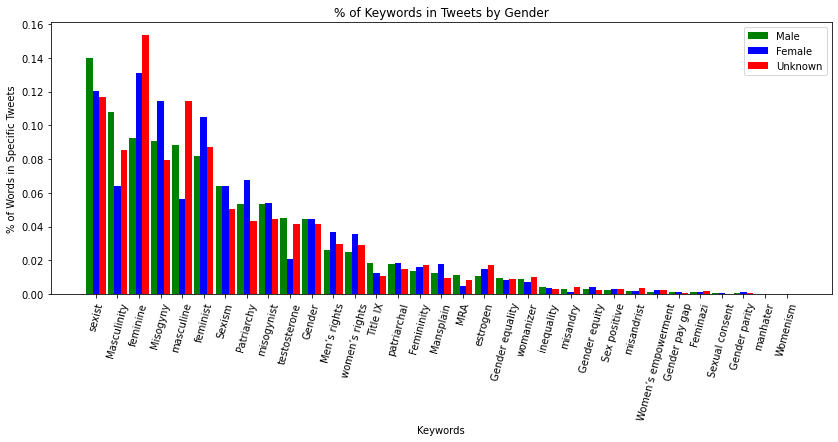

In [59]:
keywords=["Patriarchy", "Misogyny", "Sexism", "Gender", "inequality", "Gender pay gap", "Masculinity", "Femininity", "Gender equality", "Sexual consent", "Gender equity", "Womenism", "Women’s empowerment", "Gender parity", "sexist", "feminist", "misogynist", "misandrist", "misandry", "MRA", "Men’s rights", "women’s rights", "patriarchal", "masculine", "feminine", "Title IX", "Sex positive", "Mansplain", "Feminazi", "estrogen", "testosterone", "womanizer", "manhater"
]
cond1=twitter_df["gender"]=='male'
cond2=twitter_df["gender"]=='female'
cond3=twitter_df["gender"].isnull()
text1=twitter_df[cond1]["text"].reset_index()
del text1['index']
text1=text1["text"]
text2=twitter_df[cond2]["text"].reset_index()
del text2['index']
text2=text2["text"]
text3=twitter_df[cond3]["text"].reset_index()
del text3['index']
text3=text3["text"]

counts1=np.zeros(len(keywords))
for j in range(len(keywords)):
    for i in range(len(text1)):
        if keywords[j].casefold() in text1[i].casefold():
            counts1[j]+=1
counts2=np.zeros(len(keywords))
for j in range(len(keywords)):
    for i in range(len(text2)):
        if keywords[j].casefold() in text2[i].casefold():
            counts2[j]+=1
counts3=np.zeros(len(keywords))
for j in range(len(keywords)):
    for i in range(len(text3)):
        if keywords[j].casefold() in text3[i].casefold():
            counts3[j]+=1

counts1=counts1/len(text1)
counts2=counts2/len(text2)
counts3=counts3/len(text3)
grouped=pd.DataFrame([keywords,counts1,counts2,counts3]).T
grouped.columns=['Keywords','Counts1','Counts2','Counts3']
grouped=grouped.sort_values(["Counts1"],ascending=False)

x_pos = [i for i, _ in enumerate(grouped["Keywords"])]
plt.figure(figsize=(14,5))
w=.3
x_pos1=x_pos-np.ones(len(x_pos))*w
x_pos2=x_pos+np.ones(len(x_pos))*w
plt.bar(x_pos1, grouped["Counts1"], color='green',label='Male',width=w)
plt.bar(x_pos, grouped["Counts2"], color='cyan',label='Female',width=w)
plt.bar(x_pos2, grouped["Counts3"], color='red',label='Unknown',width=w)
plt.xlabel("Keywords")
plt.ylabel("% of Words in Specific Tweets")
plt.title("% of Keywords in Tweets by Gender")
plt.xticks(x_pos,grouped["Keywords"],rotation=75, fontsize=10)
plt.legend()
plt.show()

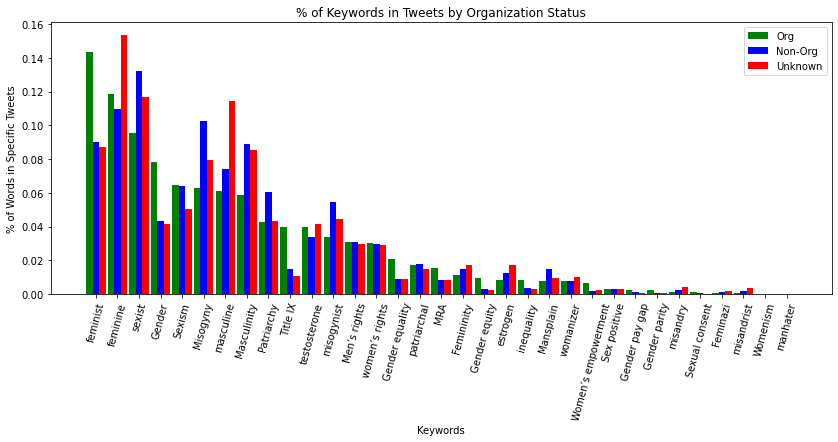

In [60]:
keywords=["Patriarchy", "Misogyny", "Sexism", "Gender", "inequality", "Gender pay gap", "Masculinity", "Femininity", "Gender equality", "Sexual consent", "Gender equity", "Womenism", "Women’s empowerment", "Gender parity", "sexist", "feminist", "misogynist", "misandrist", "misandry", "MRA", "Men’s rights", "women’s rights", "patriarchal", "masculine", "feminine", "Title IX", "Sex positive", "Mansplain", "Feminazi", "estrogen", "testosterone", "womanizer", "manhater"
]
cond1=twitter_df["org"]=='is-org'
cond2=twitter_df["org"]=='non-org'
cond3=twitter_df["org"].isnull()
text1=twitter_df[cond1]["text"].reset_index()
del text1['index']
text1=text1["text"]
text2=twitter_df[cond2]["text"].reset_index()
del text2['index']
text2=text2["text"]
text3=twitter_df[cond3]["text"].reset_index()
del text3['index']
text3=text3["text"]

counts1=np.zeros(len(keywords))
for j in range(len(keywords)):
    for i in range(len(text1)):
        if keywords[j].casefold() in text1[i].casefold():
            counts1[j]+=1
counts2=np.zeros(len(keywords))
for j in range(len(keywords)):
    for i in range(len(text2)):
        if keywords[j].casefold() in text2[i].casefold():
            counts2[j]+=1
counts3=np.zeros(len(keywords))
for j in range(len(keywords)):
    for i in range(len(text3)):
        if keywords[j].casefold() in text3[i].casefold():
            counts3[j]+=1

counts1=counts1/len(text1)
counts2=counts2/len(text2)
counts3=counts3/len(text3)
grouped=pd.DataFrame([keywords,counts1,counts2,counts3]).T
grouped.columns=['Keywords','Counts1','Counts2','Counts3']
grouped=grouped.sort_values(["Counts1"],ascending=False)

x_pos = [i for i, _ in enumerate(grouped["Keywords"])]
plt.figure(figsize=(14,5))
w=.3
x_pos1=x_pos-np.ones(len(x_pos))*w
x_pos2=x_pos+np.ones(len(x_pos))*w
plt.bar(x_pos1, grouped["Counts1"], color='green',label='Org',width=w)
plt.bar(x_pos, grouped["Counts2"], color='blue',label='Non-Org',width=w)
plt.bar(x_pos2, grouped["Counts3"], color='red',label='Unknown',width=w)
plt.xlabel("Keywords")
plt.ylabel("% of Words in Specific Tweets")
plt.title("% of Keywords in Tweets by Organization Status")
plt.xticks(x_pos,grouped["Keywords"],rotation=75, fontsize=10)
plt.legend()
plt.show()

In [58]:
counts3/len(text3)

array([0.04342477, 0.07933109, 0.05066983, 0.04164768, 0.00318965,
       0.00086576, 0.08520915, 0.01736079, 0.00906771, 0.00036453,
       0.00277955, 0.        , 0.00236945, 0.00063793, 0.11660439,
       0.08739634, 0.04470063, 0.00387314, 0.00405541, 0.00847535,
       0.03002825, 0.02902579, 0.01471794, 0.11423494, 0.15328534,
       0.0105714 , 0.00328078, 0.00961451, 0.00195935, 0.01731523,
       0.04160211, 0.01034357, 0.00018227])

Patriarchy 304.0
Misogyny 565.0
Sexism 507.0
Gender 493.0
inequality 47.0
Gender pay gap 22.0
Masculinity 426.0
Femininity 56.0
Gender equality 161.0
Sexual consent 2.0
Gender equity 51.0
Womenism 0.0
Women’s empowerment 31.0
Gender parity 23.0
sexist 761.0
feminist 462.0
misogynist 212.0
misandrist 3.0
misandry 7.0
MRA 41.0
Men’s rights 248.0
women’s rights 236.0
patriarchal 94.0
masculine 186.0
feminine 233.0
Title IX 170.0
Sex positive 12.0
Mansplain 74.0
Feminazi 4.0
estrogen 41.0
testosterone 113.0
womanizer 15.0
manhater 0.0


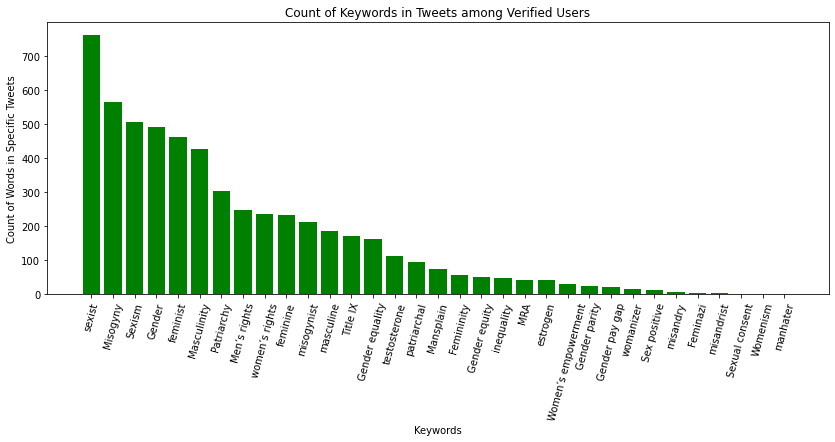

In [39]:
keywords=["Patriarchy", "Misogyny", "Sexism", "Gender", "inequality", "Gender pay gap", "Masculinity", "Femininity", "Gender equality", "Sexual consent", "Gender equity", "Womenism", "Women’s empowerment", "Gender parity", "sexist", "feminist", "misogynist", "misandrist", "misandry", "MRA", "Men’s rights", "women’s rights", "patriarchal", "masculine", "feminine", "Title IX", "Sex positive", "Mansplain", "Feminazi", "estrogen", "testosterone", "womanizer", "manhater"
]
text=twitter_df[twitter_df['user_verified']==True]["text"].reset_index()
del text['index']
text=text["text"]

counts=np.zeros(len(keywords))
for j in range(len(keywords)):
    for i in range(len(text)):
        if keywords[j].casefold() in text[i].casefold():
            counts[j]+=1
        

for i in range(0,len(keywords)):
    print(keywords[i],counts[i])

grouped=pd.DataFrame([keywords,counts]).T
grouped.columns=['Keywords','Counts']
grouped=grouped.sort_values(["Counts"],ascending=False)

x_pos = [i for i, _ in enumerate(grouped["Keywords"])]
plt.figure(figsize=(14,5))
plt.bar(x_pos, grouped["Counts"], color='green')
plt.xlabel("Keywords")
plt.ylabel("Count of Words in Specific Tweets")
plt.title("Count of Keywords in Tweets among Verified Users")
plt.xticks(x_pos,grouped["Keywords"],rotation=75, fontsize=10)
plt.show()

Patriarchy 1487.0
Misogyny 2883.0
Sexism 1738.0
Gender 1202.0
inequality 113.0
Gender pay gap 37.0
Masculinity 1951.0
Femininity 288.0
Gender equality 241.0
Sexual consent 11.0
Gender equity 134.0
Womenism 0.0
Women’s empowerment 86.0
Gender parity 52.0
sexist 3014.0
feminist 1964.0
misogynist 1550.0
misandrist 16.0
misandry 40.0
MRA 163.0
Men’s rights 804.0
women’s rights 779.0
patriarchal 554.0
masculine 1855.0
feminine 1979.0
Title IX 309.0
Sex positive 104.0
Mansplain 283.0
Feminazi 26.0
estrogen 307.0
testosterone 815.0
womanizer 100.0
manhater 1.0


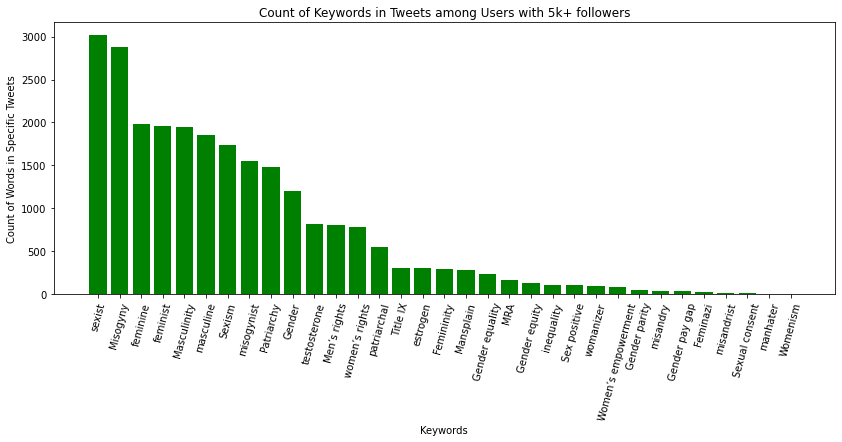

In [75]:
keywords=["Patriarchy", "Misogyny", "Sexism", "Gender", "inequality", "Gender pay gap", "Masculinity", "Femininity", "Gender equality", "Sexual consent", "Gender equity", "Womenism", "Women’s empowerment", "Gender parity", "sexist", "feminist", "misogynist", "misandrist", "misandry", "MRA", "Men’s rights", "women’s rights", "patriarchal", "masculine", "feminine", "Title IX", "Sex positive", "Mansplain", "Feminazi", "estrogen", "testosterone", "womanizer", "manhater"
]
text=twitter_df[twitter_df['user_followers_count']>5000]["text"].reset_index()
del text['index']
text=text["text"]

counts=np.zeros(len(keywords))
for j in range(len(keywords)):
    for i in range(len(text)):
        if keywords[j].casefold() in text[i].casefold():
            counts[j]+=1
        

for i in range(0,len(keywords)):
    print(keywords[i],counts[i])

grouped=pd.DataFrame([keywords,counts]).T
grouped.columns=['Keywords','Counts']
grouped=grouped.sort_values(["Counts"],ascending=False)

x_pos = [i for i, _ in enumerate(grouped["Keywords"])]
plt.figure(figsize=(14,5))
plt.bar(x_pos, grouped["Counts"], color='green')
plt.xlabel("Keywords")
plt.ylabel("Count of Words in Specific Tweets")
plt.title("Count of Keywords in Tweets among Users with 5k+ followers")
plt.xticks(x_pos,grouped["Keywords"],rotation=75, fontsize=10)
plt.show()

Patriarchy 7.0
Misogyny 15.0
Sexism 14.0
Gender 7.0
inequality 1.0
Gender pay gap 1.0
Masculinity 19.0
Femininity 2.0
Gender equality 1.0
Sexual consent 0.0
Gender equity 1.0
Womenism 0.0
Women’s empowerment 0.0
Gender parity 0.0
sexist 26.0
feminist 20.0
misogynist 12.0
misandrist 0.0
misandry 0.0
MRA 1.0
Men’s rights 5.0
women’s rights 5.0
patriarchal 1.0
masculine 11.0
feminine 16.0
Title IX 1.0
Sex positive 0.0
Mansplain 6.0
Feminazi 0.0
estrogen 1.0
testosterone 4.0
womanizer 0.0
manhater 0.0


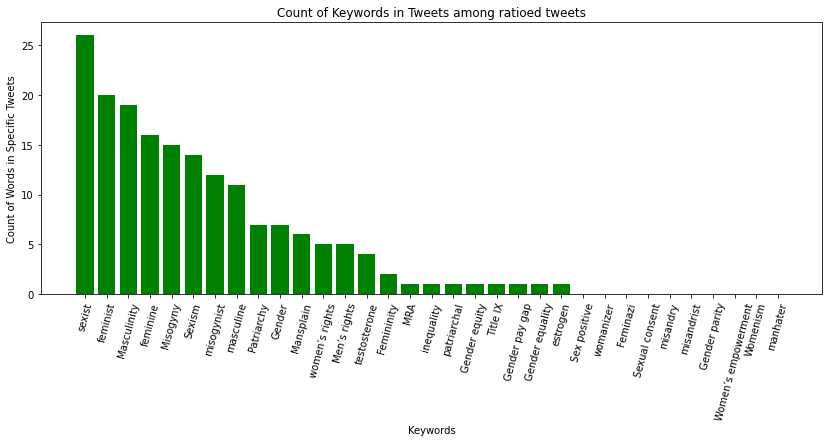

In [6]:
keywords=["Patriarchy", "Misogyny", "Sexism", "Gender", "inequality", "Gender pay gap", "Masculinity", "Femininity", "Gender equality", "Sexual consent", "Gender equity", "Womenism", "Women’s empowerment", "Gender parity", "sexist", "feminist", "misogynist", "misandrist", "misandry", "MRA", "Men’s rights", "women’s rights", "patriarchal", "masculine", "feminine", "Title IX", "Sex positive", "Mansplain", "Feminazi", "estrogen", "testosterone", "womanizer", "manhater"
]
text=twitter_df[twitter_df['ratioed']==True]["text"].reset_index()
del text['index']
text=text["text"]

counts=np.zeros(len(keywords))
for j in range(len(keywords)):
    for i in range(len(text)):
        if keywords[j].casefold() in text[i].casefold():
            counts[j]+=1
        

for i in range(0,len(keywords)):
    print(keywords[i],counts[i])

grouped=pd.DataFrame([keywords,counts]).T
grouped.columns=['Keywords','Counts']
grouped=grouped.sort_values(["Counts"],ascending=False)

x_pos = [i for i, _ in enumerate(grouped["Keywords"])]
plt.figure(figsize=(14,5))
plt.bar(x_pos, grouped["Counts"], color='green')
plt.xlabel("Keywords")
plt.ylabel("Count of Words in Specific Tweets")
plt.title("Count of Keywords in Tweets among ratioed tweets")
plt.xticks(x_pos,grouped["Keywords"],rotation=75, fontsize=10)
plt.show()

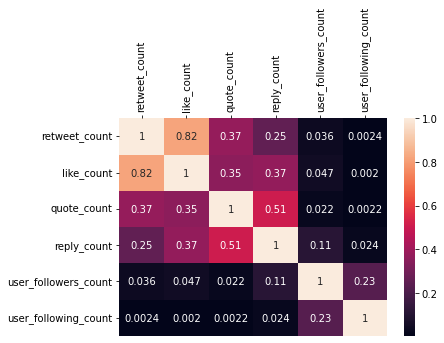

In [13]:
import pandas as pd
import seaborn as sn
correl_df=twitter_df[['retweet_count','like_count','quote_count','reply_count','user_followers_count','user_following_count']]
#twitter_df[twitter_df.columns[3:7]]
corrMatrix = correl_df.corr()
sn.heatmap(corrMatrix, annot=True).xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()